# Semianr 3&4 - Applied Quantitative Logistics

### Evolution is the product of:

- Natural Selection
- Reproduction (Desire for immortality)
- Mutation
- Symbiosis

#### Steps of an evolutionary algorithm:

- **Initializing** a set of random solutions
- **Comparing** results, **rating** them, then **selecting** the best
- **Combining** obtained solutions by simmulating the process, producing offspring, and combining new solutions by old solutions from the last iteration
- **Returning** to the second step (if needed)

### Some Terminologies:

- **Optimization** (Problem type)
- **Ojective function** (What we are going to optimize)
    - **Minimization** (Cost function, error function)
    - **Maximization** (Fitness function, profit function)

## Genetic Algorithm

The most well-known evolutionary algorithm (natured inspired algorithm, metaheuristic algorithm) is Genetic Algorithm (GA).

It is changing continiously.

#### GA Steps:

- Initializing a set of random solutions - Evaluating the population
- Select parents and combine them (cross-over) to create offspring population
- Selecting candidate for mutation, and making mutated population
- Combining the main population, offspring and mutated population and make a new population
- If the termination condition is not valid, return to the second step. Otherwise, terminate.

In selection, cross-over, mutation, combining all population in pool can have different senario. 

How to define the senario?

- Depends on the type of the problem

#### Different strategy for termination:

- Defining a threshold to terminate the process
- If the change is cost function between the current state with previous < epsilon
- If after many iterations there was a slight change
- Defining the maximum iteration for the process
- Defining the time (i.e after 30 min, 1 hour, ...)
- Reaching to the specific number of fuction evaluation (NFE)

In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Binary GA

**Problem:** Min One
$$
\min{z} = f(x) = \begin{equation*}
\sum_{i=1}^n x_i \end{equation*}
$$

$$
x_i \in \{0, 1\}
$$

In [2]:
# def MinOne(x):
#     return sum(x)

In [3]:
# Cost function including NFE calculation
def MinOne(x):
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE+=1
    
    return sum(x)

In [4]:
# Sort the population and cost (based on the cost)
def pop_sort(p, c):
    li = []
    for i in range(len(c)):
        li.append([c[i],i])
        
    li.sort()
    sort_index = []
    
    for x in li:
        sort_index.append(x[1])
    
    positions, cost = [], []
    for i in sort_index:
        positions.append(p[i])
        cost.append(c[i])
        
    return positions, cost

### CrossOver Variants

In [5]:
# Uniform Crossover is better than double point crossover better than single point crossover

# Single point crossover
def singlePoint_crossover(x1, x2):
    index = int(np.random.randint(1, len(x1)-1, size=1))
    
    y1 = x1[:index] + x2[index:]
    y2 = x2[:index] + x1[index:]
    
    return y1, y2

# Double Point Crossover
def doublePoint_crossover(x1, x2):
    ind = random.sample(range(1, len(x1)-1), 2)
    
    index1 = min(ind)
    index2 = max(ind)
    
    # Another way is to generate sequence from, 1 to len(x1)-1 then shuffle it
    # Then select first two elements (it won't be the same at all) --> my_ind = list(range(1, len(x1)-1))
    # random.shuffle(my_list)
    y1 = x1[:index1] + x2[index1:index2] + x1[index2:]
    y2 = x2[:index1] + x1[index1:index2] + x2[index2:]
    
    return y1, y2

# Uniform Crossover
def uniform_crossover(x1, x2):
    alpha = list(np.random.randint(2, size=len(x1)))
    
    y1 = list(np.multiply(alpha, x1) + (1-np.array(alpha)) * np.array(x2))
    y2 = list(np.multiply(alpha, x2) + (1-np.array(alpha)) * np.array(x1))
    
    return y1, y2

def CrossOver(x1, x2):
    METHOD = np.random.randint(3)
    
    if METHOD == 0:
        y1, y2 = singlePoint_crossover(x1, x2)
    elif METHOD == 1:
        y1, y2 = doublePoint_crossover(x1, x2)
    elif METHOD == 2:
        y1, y2 = uniform_crossover(x1, x2)
    
    return y1, y2

### Mutation

In [6]:
def Mutation(x):
    index = int(np.random.randint(0, len(x), size=1))
    
    y = x.copy()
    
    y[index] = 1-x[index]
    
    return y

In [7]:
### Problem Parameters Definition ###
nVar = 50       # Number of decision variables

global NFE
NFE = 0

### GA Parameters ###
maxIt = 100     # Maximum numner of iterations
nPop = 60       # Population size 

pc = 0.8                   # Crossover percentage
nc = 2*round(pc*nPop/2)    # Number of offsprings (parents)

pm = 0.3                   # Mutation percentage
nm = round(pm*nPop)        # Number of mutants2 = unifrnd(0,2 = unifrnd(0,

### Initialization ###
pop, costs = [], []

for i in range(0, nPop):
    pop.append(list(np.random.randint(2, size=nVar)))
    costs.append(MinOne(pop[i]))

# Sort the population and costs
pop, costs = pop_sort(pop, costs)

#  Store the best solution
bestSolution = [pop[0]]

# Array to hold best cost values
bestCosts = [costs[0]]

# Store the NFE into the array
nfe = [NFE]

### Main Loop ###
for it in range(1, maxIt):
    
    # Crossover
    popc, popc_cost = [], []
    for k in range(1, int(nc/2)):
        
        # Select parent indices
        rand1 = int(np.random.randint(nPop, size=1))
        rand2 = int(np.random.randint(nPop, size=1))
        
        # Select parents
        p1 = pop[rand1]
        p2 = pop[rand2]
        
        # Apply crossover
#         y1, y2 = singlePoint_crossover(p1, p2)
#         y1, y2 = doublePoint_crossover(p1, p2)
#         y1, y2 = uniform_crossover(p1, p2)

        y1, y2 = CrossOver(p1, p2)
        
        # Store the offspring after crossover
        popc.append(y1)
        popc.append(y2)
        
        # Evaluate the offspring
        popc_cost.append(MinOne(y1))
        popc_cost.append(MinOne(y2))
        
    # Mutation
    popm, popm_cost = [], []
    for k in range(1, nm):
        
        # Select parent
        rand = int(np.random.randint(nPop, size=1))
        p = pop[rand]
        
        # Apply Mutation
        popm.append(Mutation(p))
        
        # Evaluate the offspring
        popm_cost.append(MinOne(popm[-1]))
        
    # Create merged population
    pop = pop + popm + popc
    costs = costs + popm_cost + popc_cost
    
    # sort the whole population
    pop, costs = pop_sort(pop, costs)
    
    # Truncation
    pop = pop[:nPop]
    costs = costs[:nPop]
    
    # Store the best solution
    bestSolution.append(pop[0])
    
    # Store the best cost
    bestCosts.append(costs[0])
    
    # Append NFE to the array
    nfe.append(NFE)
    
#     if bestCosts[-2] == 0:
#         break
        
    print(f'Iteration {it} : NFE = {nfe[-1]}, Best Cost = {bestCosts[it]}')

Iteration 1 : NFE = 123, Best Cost = 19
Iteration 2 : NFE = 186, Best Cost = 18
Iteration 3 : NFE = 249, Best Cost = 15
Iteration 4 : NFE = 312, Best Cost = 15
Iteration 5 : NFE = 375, Best Cost = 15
Iteration 6 : NFE = 438, Best Cost = 12
Iteration 7 : NFE = 501, Best Cost = 12
Iteration 8 : NFE = 564, Best Cost = 11
Iteration 9 : NFE = 627, Best Cost = 10
Iteration 10 : NFE = 690, Best Cost = 9
Iteration 11 : NFE = 753, Best Cost = 9
Iteration 12 : NFE = 816, Best Cost = 7
Iteration 13 : NFE = 879, Best Cost = 6
Iteration 14 : NFE = 942, Best Cost = 5
Iteration 15 : NFE = 1005, Best Cost = 5
Iteration 16 : NFE = 1068, Best Cost = 5
Iteration 17 : NFE = 1131, Best Cost = 4
Iteration 18 : NFE = 1194, Best Cost = 2
Iteration 19 : NFE = 1257, Best Cost = 2
Iteration 20 : NFE = 1320, Best Cost = 2
Iteration 21 : NFE = 1383, Best Cost = 1
Iteration 22 : NFE = 1446, Best Cost = 0
Iteration 23 : NFE = 1509, Best Cost = 0
Iteration 24 : NFE = 1572, Best Cost = 0
Iteration 25 : NFE = 1635, Bes

Text(0, 0.5, 'Costs')

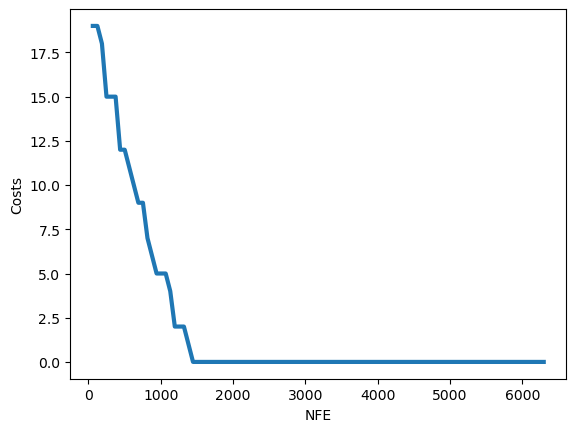

In [8]:
# Plot the result
plt.plot(nfe, bestCosts, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Costs')

# HW3 - Applied Quantitative Logistics

Implement all other variants of Mutations which are explained below:

1) **Displacement Mutation** is already implemented during the seminar, first, an index was generated then we changed the data of that index.

2) **Swap Mutation** generates an index and swaps the data of that index with the next gene.

3) **Big Swap Mutation** generates two random indexes and changes the data of the two indexes.

4) **Inverse Mutation** generates two random indexes and then reverses the information of genes between two indexes.

5) Write a function for Mutation to do all different types of Mutation randomly during the process of the Genetic Algorithm (As we did for a crossover)

6) Implement a mutation rate (impact) to specify how many genes should be changed for **Displacement Mutation** (e.g if the nVar = 10 and the mu_rate=0.2 then the number of changes for mutation should be two genes in one mutation process)


Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **February 24, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW3_AQL]-YOUR_NAME**

In [9]:
"""def Mutation(x):
    index = int(np.random.randint(0, len(x), size=1))
    y = x[:]
    y[index] = 1-x[index]
    return y"""

def displacement_mutation(x):
    index = int(np.random.randint(0, len(x), size=1))
    y = x[:]
    y[index] = 1-x[index]
    return y


def swap_mutation(x):
    i1 = int(np.random.randint(0, len(x), size=1))
    i2 = (i1+1)%len(x)
    y = x[:]
    y[i1],y[i2] = y[i2],y[i1]
    return y


def big_swap_mutation(x):
    i1,i2 = np.random.randint(0, len(x), size=2)
    y = x[:]
    y[i1],y[i2] = y[i2],y[i1]
    return y


def inverse_mutation(x):
    i1,i2 = np.random.randint(0, len(x), size=2)
    y = x[:]
    i1,i2 = min(i1,i2),max(i1,i2)
    y[i1:i2] = y[i1:i2][::-1]
    return y

def displacement_with_mutation(x, mu_rate=0):
    if mu_rate:
        mu = round(len(x) * mu_rate)
    else:
        mu = 1
    id = np.random.choice(len(x), size=mu)
    y = np.asarray(x).copy()
    y[id] = 1 - y[id]
    return y


def mutation(x):
    METHOD = np.random.randint(5)
    
    if METHOD == 0:
        y = displacement_mutation(x)
    elif METHOD == 1:
        y = big_swap_mutation(x)
    elif METHOD == 2:
        y = inverse_mutation(x)
    elif METHOD == 3:
        y = swap_mutation(x)
    elif METHOD == 4:
        y = displacement_with_mutation(x)
    
    return y
